***
## Introdução a testes estatísticos
***

### Datasets utilizados:

* Versão reduzida do [MovieLens](https://grouplens.org/datasets/movielens/100k/), do instituto de pesquisa Grouplens, que agrupa avaliações de filmes.
* o [TMDB 5000](https://www.kaggle.com/tmdb/tmdb-movie-metadata), disponível no site da comunidade Kaggle, que contém informações como faturamento, orçamento, ano de lançamento, país de origem, entre outras.

***

In [1]:
# Importação de bibliotecas:

import pandas as pd
import seaborn as sns

In [2]:
# Importação da base de dados:

tmdb = pd.read_csv('data/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Análise Exploratória dos dados:

In [3]:
# Mais informações sobre os dados:

tmdb.describe().round(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.00,4803.00,4.803000e+03,4801.00,4803.00,4803.00
mean,2.904504e+07,57165.48,21.49,8.226064e+07,106.88,6.09,690.22
std,4.072239e+07,88694.61,31.82,1.628571e+08,22.61,1.19,1234.59
min,0.000000e+00,5.00,0.00,0.000000e+00,0.00,0.00,0.00
25%,7.900000e+05,9014.50,4.67,0.000000e+00,94.00,5.60,54.00
50%,1.500000e+07,14629.00,12.92,1.917000e+07,103.00,6.20,235.00
75%,4.000000e+07,58610.50,28.31,9.291719e+07,118.00,6.80,737.00
max,3.800000e+08,459488.00,875.58,2.787965e+09,338.00,10.00,13752.00


Text(0.5, 0, 'Nota média')

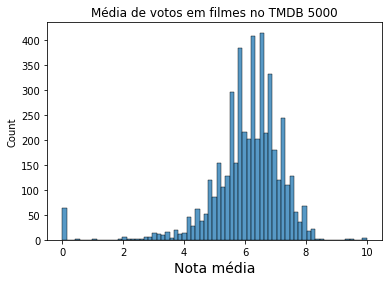

In [4]:
# Gráfico da média de votos (variável 'vote_average'):

ax = sns.histplot(tmdb['vote_average'])
ax.set_title('Média de votos em filmes no TMDB 5000')
ax.set_xlabel('Nota média', fontsize = 14)

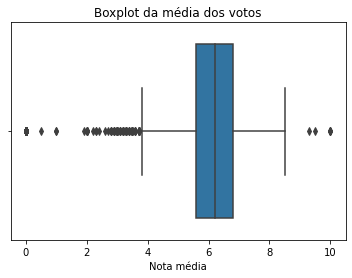

In [5]:
# Boxplot da variável 'vote_average':

ax = sns.boxplot(x = tmdb['vote_average'])
ax.set_title('Boxplot da média dos votos')
ax.set_xlabel('Nota média')
ax = ax

### Investigações adicionais:

#### Para que um filme possua média EXATAMENTE igual a zero ou dez, faz-se necessário que TODOS os usuários votantes tenham atribuído-lhe notas iguais a zero ou dez. Tal possibilidade existe, porém é remota.

In [6]:
# Quais são os filmes cuja média de votos (vote_average) é igual a zero?

tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


#### Note que:

* Pelo que se pode observar, os filmes que possuem média zero não tem nenhum voto (ou apenas 1 voto). Não se pode, portanto, considerar esses filmes como filmes ruins (talvez sejam!) já que, nesses registros, não há nenhuma avaliação (ou pouquíssimas avaliações).

* O mesmo acontece com aqueles filmes que tem dez como média.

* Filmes que possuem pouquíssimos votos podem não ser classificados na melhor maneira.

In [7]:
# Quais são os filmes cuja média de votos (vote_average) é igual a dez?

tmdb.query('vote_average == 10').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


In [8]:
# Selecionando somente filmes que possuam, ao menos, 10 votos.

tmdb_mais_10_votos = tmdb.query('vote_count >= 10')

In [9]:
# Mais informações:

tmdb_mais_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0.5, 0, 'Nota média')

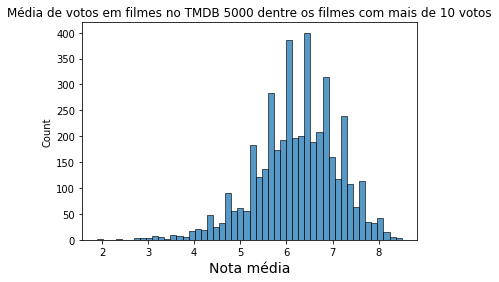

In [10]:
# Gráfico da média de votos (variável 'vote_average') dentre os filmes com mais de 10 votos:

ax = sns.histplot(tmdb_mais_10_votos['vote_average'])
ax.set_title('Média de votos em filmes no TMDB 5000 dentre os filmes com mais de 10 votos')
ax.set_xlabel('Nota média', fontsize = 14)

### Análise das notas do MovieLens:

In [11]:
notas = pd.read_csv('data/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
# Não possuímos, no dataset acima, o valor da média da nota dos filmes. 
# Cálculo da média:

nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 0, 'Nota média')

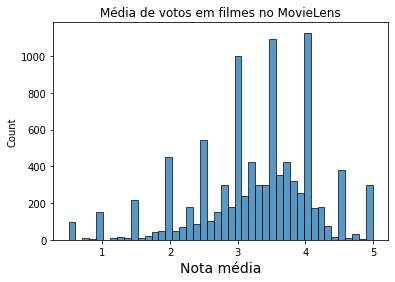

In [13]:
# Plotando o histograma dessas notas:

ax = sns.histplot(nota_media_por_filme.values)
ax.set_title('Média de votos em filmes no MovieLens')
ax.set_xlabel('Nota média', fontsize = 14)

### Note que:

* Aparentemente neste dataset, as notas variam de 1 até 5.

* Não há filmes com nota média igual a zero, mas há com média igual a 5. Será necessária verificação destes filmes.

In [14]:
# Verificando a quantidade de votos por filme:

qtd_votos_por_filme = notas.groupby('movieId').count()

In [15]:
# Destes, necessito apenas daqueles que possuam 10 votos ou mais:

filmes_pelo_menos_10_votos = qtd_votos_por_filme.query('rating >= 10').index
filmes_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [16]:
# Filtrando a nota média dos filmes que tem, pelo menos, 10 votos:

nota_media_filme_10_notas = nota_media_por_filme.loc[filmes_pelo_menos_10_votos.values]
nota_media_filme_10_notas.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 0, 'Nota média')

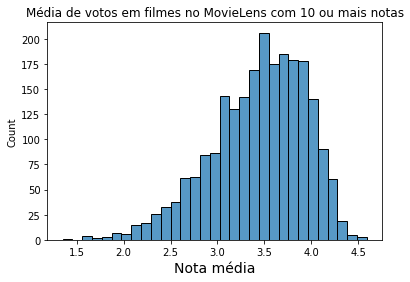

In [17]:
# Plotando o histograma das notas médias dos filmes com pelo menos 10 notas:

ax = sns.histplot(nota_media_filme_10_notas.values)
ax.set_title('Média de votos em filmes no MovieLens com 10 ou mais notas')
ax.set_xlabel('Nota média', fontsize = 14)

Text(0.5, 0, 'Nota média')

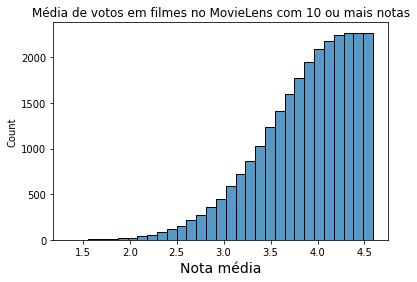

In [18]:
# Plotando o histograma das notas médias ACUMULADAS dos filmes com pelo menos 10 notas:

ax = sns.histplot(nota_media_filme_10_notas.values, cumulative = True)
ax.set_title('Média de votos em filmes no MovieLens com 10 ou mais notas')
ax.set_xlabel('Nota média', fontsize = 14)

### Analisando a distribuição de outros campos do dataset TMDB:

In [19]:
# Variável 'vote_count':

tmdb_mais_10_votos['vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

Text(0.5, 0, 'Número de votos')

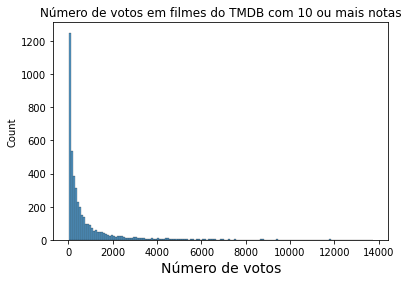

In [20]:
# Plotando o histograma do número de votos dos filmes com pelo menos 10 notas:

ax = sns.histplot(tmdb_mais_10_votos['vote_count'].values)
ax.set_title('Número de votos em filmes do TMDB com 10 ou mais notas')
ax.set_xlabel('Número de votos', fontsize = 14)

In [21]:
# Variável 'budget' (de todos os filmes, não somente os que possuem 10 ou mais votos:

tmdb.query('budget > 0')['budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

Text(0.5, 0, 'Orçamento')

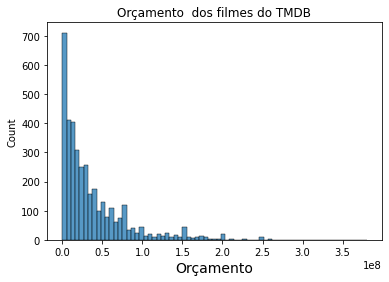

In [22]:
# Plotando o histograma do orçamento dos filmes do TMDB:

ax = sns.histplot(tmdb.query('budget > 0')['budget'].values)
ax.set_title('Orçamento  dos filmes do TMDB')
ax.set_xlabel('Orçamento', fontsize = 14)

In [23]:
# Variável 'Runtime':

# Verificando se existem valores nulos nesta variável:

tmdb['runtime'].isna().sum()

2

### MovieLens: média dos filmes com pelo menos 10 notas

In [24]:
print(f'Média dos filmes com pelo menos 10 notas {nota_media_filme_10_notas.mean()}')

Média dos filmes com pelo menos 10 notas 3.4320503405352594


#### Calculando o intervalo de confiança da nota média dos filmes com mais de 10 notas:

In [25]:
from statsmodels.stats.weightstats import zconfint

In [26]:
zconfint(nota_media_filme_10_notas)

(3.4112459477469557, 3.452854733323563)

### Interpretação:

#### Dado o meu conjunto de dados e supondo que este conjunto seja grande o suficiente para a aplicação deste teste, temos o intervalo de confiança entre 3.411 e 3.452 para os filmes em geral, não apenas para os da amostra.